# Compare RAGIS ice-sheet wide timeseries to IMBIE

In [40]:
from datetime import datetime
import numpy as np
import pylab as plt
import xarray as xr
from glob import glob
import pandas as pd
import os
import seaborn as sns

from pismragis.observations import load_imbie
from pismragis.analysis import resample_ensemble_by_data
from pismragis.processing import convert_netcdf_to_dataframe
from pismragis.sensitivity import sensitivity_analysis

## Load IMBIE

In [41]:
imbie = load_imbie()

glob PISM scalar time series files

In [85]:
data_dir = "../hindcasts"

proj_dir = "2023_04_ocean_simple"
scalar_dir = "processed"
lhs = "gris_ragis_ocean_simple_lhs_50_w_posterior"

proj_dir = "2023_04_ocean_simple_20"
scalar_dir = "processed"
lhs = "gris_ragis_ocean_simple_lhs_20"

proj_dir = "2023_04_ocean_20"
scalar_dir = "processed"
lhs = "gris_ragis_ocean_lhs_20"



ens_file = os.path.join(data_dir, proj_dir, "uq", f"{lhs}.csv")
scalar_files = sorted(glob(os.path.join(data_dir, proj_dir, scalar_dir, "ts_gris_g*00m_v20*RAGIS_id_*_1980-1-1_2020-1-1.nc")))

In [86]:
df = convert_netcdf_to_dataframe(scalar_files, resample="yearly")

Processing files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.82it/s]

Program finished in 2 seconds


In [87]:
sa_df = sensitivity_analysis(df, ensemble_file=ens_file)

Processing file: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:04<00:00,  9.74it/s]


## Plot

Plot time series of cumulative mass change (cm SLE) and discharge at grounding line (Gt/yr)

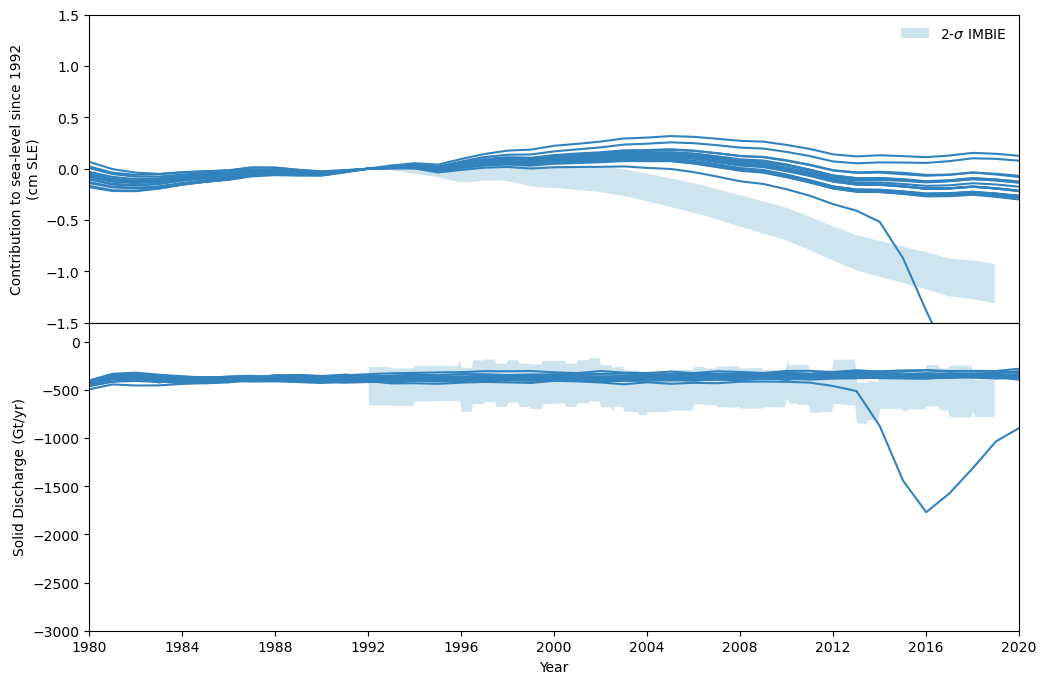

In [88]:
mass_varname = "limnsw"
flux_varname = "grounding_line_flux"
bg_color = "#216779"
bg_color = "w"

sim_color = "#3182bd"
imbie_color = "#9ecae1"
    
kg2cmsle = 1 / 1e12 * 1.0 / 362.5 / 10.0
gt2cmsle = 1 / 362.5 / 10.0
sigma = 2
plt.style.use('default')

fig, axs = plt.subplots(nrows=2, ncols=1, sharex="col", figsize=(12, 8))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

for id, ens in df.groupby(by="id"):
    norm_year = ens[ens["Year"] == 1992]
    axs[0].plot(ens["time"], (ens["limnsw (kg)"] - norm_year["limnsw (kg)"].values) * kg2cmsle, color=sim_color )
    axs[1].plot(ens["time"], (ens["grounding_line_flux (Gt year-1)"]), color=sim_color )


axs[0].fill_between(imbie["Date"], 
                    (imbie["Mass (Gt)"] + sigma * imbie["Mass uncertainty (Gt)"]) * gt2cmsle, 
                    (imbie["Mass (Gt)"] - sigma * imbie["Mass uncertainty (Gt)"]) / 362.5 / 10.0, 
                    ls="solid", lw=0, alpha=0.5, color=imbie_color, label="2-$\sigma$ IMBIE")
axs[1].fill_between(imbie["Date"], 
                    (imbie["D (Gt/yr)"] + sigma * imbie["D uncertainty (Gt/yr)"]), 
                    (imbie["D (Gt/yr)"] - sigma * imbie["D uncertainty (Gt/yr)"]), 
                    ls="solid", lw=0, alpha=0.5, color=imbie_color)



fig.set_facecolor(bg_color)
for ax in axs:
    ax.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

    
axs[0].set_xlabel("")
axs[0].set_ylabel("Contribution to sea-level since 1992\n(cm SLE)")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Solid Discharge (Gt/yr)")
axs[0].set_xlim(pd.to_datetime("1980-1-1"), pd.to_datetime("2020-1-1"))
axs[0].set_ylim(-1.5, 1.5)
axs[1].set_ylim(-3000, 200)
legend = axs[0].legend()
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(0.0)
fig.savefig(f"ragis-{lhs}_scalar.pdf")


(2.62e+18, 2.64e+18)

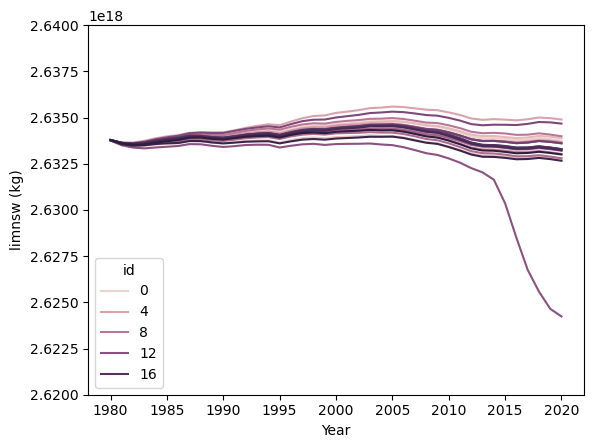

In [89]:
lp = sns.lineplot(data=df.reset_index(), x="Year", y="limnsw (kg)", hue="id", ci=90)
lp.set_ylim(2.62e18, 2.64e18)

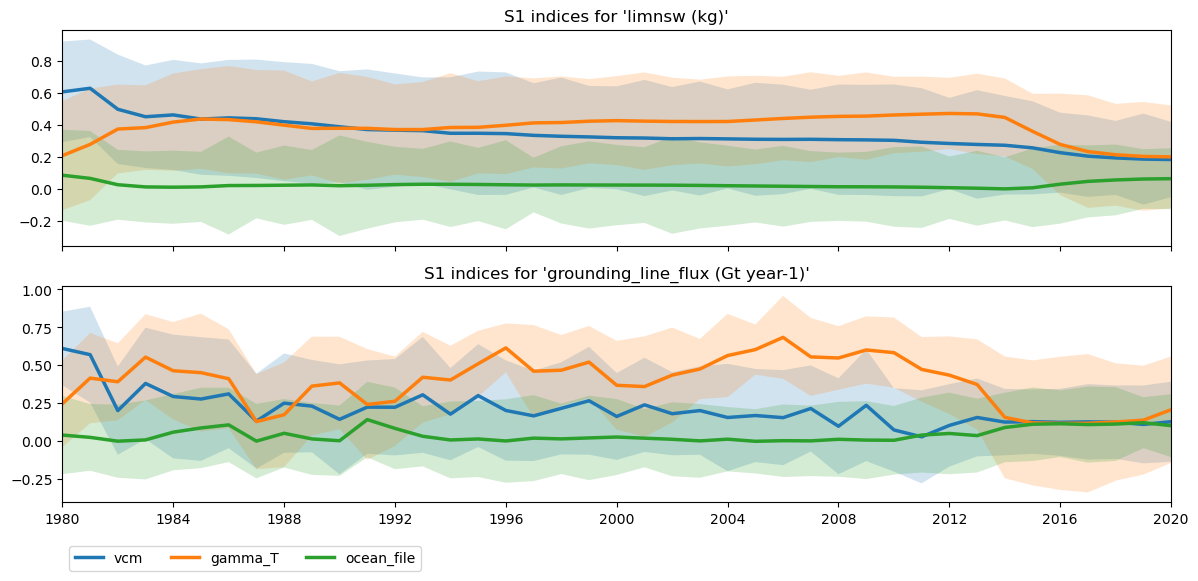

Processing 1982-01-01 00:00:00
Processing 1987-01-01 00:00:00
Processing 1991-01-01 00:00:00
Processing 1994-01-01 00:00:00
Processing 1997-01-01 00:00:00
Processing 2000-01-01 00:00:00
Processing 2004-01-01 00:00:00
Processing 2008-01-01 00:00:00
Processing 2013-01-01 00:00:00
Processing 2017-01-01 00:00:00
Processing 1981-01-01 00:00:00
Processing 1987-01-01 00:00:00
Processing 1990-01-01 00:00:00
Processing 1995-01-01 00:00:00
Processing 1999-01-01 00:00:00
Processing 2002-01-01 00:00:00
Processing 2006-01-01 00:00:00
Processing 2010-01-01 00:00:00
Processing 2014-01-01 00:00:00
Processing 2018-01-01 00:00:00
Processing 1982-01-01 00:00:00
Processing 1987-01-01 00:00:00
Processing 1990-01-01 00:00:00
Processing 1994-01-01 00:00:00
Processing 1998-01-01 00:00:00
Processing 2003-01-01 00:00:00
Processing 2007-01-01 00:00:00
Processing 2011-01-01 00:00:00
Processing 2015-01-01 00:00:00
Processing 2019-01-01 00:00:00
Processing 1980-01-01 00:00:00
Processing 1984-01-01 00:00:00
Processi

In [90]:
    si = "S1"
    outfile = f"{lhs}.pdf"
    fig, axs = plt.subplots(
        2,
        1,
        sharex="col",
        figsize=[12, 6],
    )
    fig.subplots_adjust(bottom=0.0)
    for k, m_var in enumerate(["limnsw (kg)", "grounding_line_flux (Gt year-1)"]):
        m_df = sa_df[sa_df["Variable"] == m_var]
        ax = axs.ravel()[k]
        p_df = m_df[m_df["Si"] == si].drop(columns=["Si", "Variable"]).set_index("Date")
        p_conf_df = m_df[m_df["Si"] == si + "_conf"].drop(columns=["Si"])

        [
            ax.plot(p_df.index, p_df[v], lw=2.5, label=v)
            for v in sa_df.drop(columns=["Si", "Variable", "Date"]).keys()
        ]

        [
            ax.fill_between(
                p_df.index,
                p_df[v].values - p_conf_df[v].values,
                p_df[v].values + p_conf_df[v].values,
                alpha=0.2,
                lw=0,
            )
            for v in sa_df.drop(columns=["Si", "Variable", "Date"]).keys()
        ]
        ax.set_xlim(datetime(1980, 1, 1), datetime(2020, 1, 1))
        lgd = ax.set_title(f"{si} indices for '{m_var}'")
    legend = axs[-1].legend(loc="lower left", ncols=3, bbox_to_anchor=(0, -0.35))
    fig.tight_layout()
    fig.savefig(f"{si}_{outfile}")


In [80]:
ragis_calib = resample_ensemble_by_data(imbie, df, 
                                        fudge_factor=5)
calib_exps = ragis_calib["Experiment"].unique()
print(calib_exps)

KeyError: 'Mass (Gt)'

NameError: name 'ragis_calib' is not defined

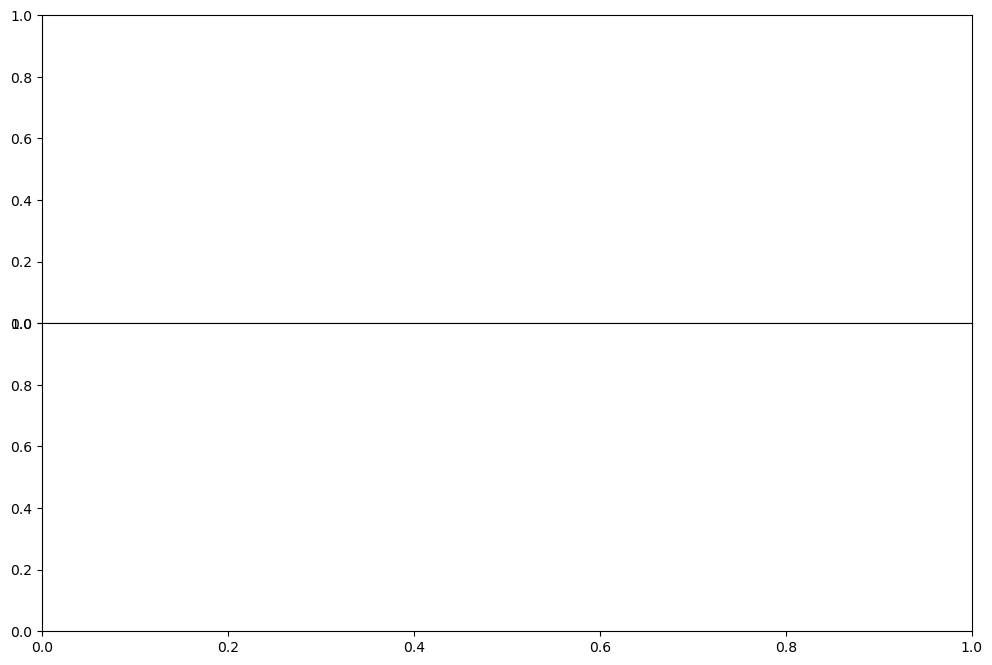

In [81]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex="col", figsize=(12, 8))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

q_5 = ragis_calib.groupby(by="Year").quantile(0.05)
q_16 = ragis_calib.groupby(by="Year").quantile(0.16)
q_50 = ragis_calib.groupby(by="Year").quantile(0.50)
q_84 = ragis_calib.groupby(by="Year").quantile(0.84)
q_95 = ragis_calib.groupby(by="Year").quantile(0.95)
for exp in calib_exps:
    e = data_df[data_df["Experiment"] == exp]
    axs[0].plot(e["Year"], e["Mass (Gt)"])
    axs[1].plot(e["Year"], e["D (Gt/yr)"])

# axs[0].fill_between(q_50.index, q_16["Mass (Gt)"], q_84["Mass (Gt)"], color="w")
axs[0].fill_between(imbie["Year"], 
                    (imbie["Mass (Gt)"] + sigma * imbie["Mass uncertainty (Gt)"]), 
                    (imbie["Mass (Gt)"] - sigma * imbie["Mass uncertainty (Gt)"]), 
                    ls="solid", lw=0, alpha=0.5, color="#6baed6", label="2-$\sigma$ IMBIE")
axs[1].fill_between(imbie["Year"], 
                    (imbie["D (Gt/yr)"] + sigma * imbie["D uncertainty (Gt/yr)"]), 
                    (imbie["D (Gt/yr)"] - sigma * imbie["D uncertainty (Gt/yr)"]), 
                    ls="solid", lw=0, alpha=1, color=imbie_color)


axs[0].set_xlim(1992, 2017)
fig.set_facecolor(bg_color)
for ax in axs:
    ax.set_facecolor(bg_color)
fig.set_facecolor(bg_color)




In [82]:
category_dict = {
    "Climate": {"color": "#81c77f", "vars": []},
    "Surface": {"color": "#886c62"},
    "Ocean": {"color": "#beaed4"},
    "Ice Dynamics": {"color": "#dcd588"},
}


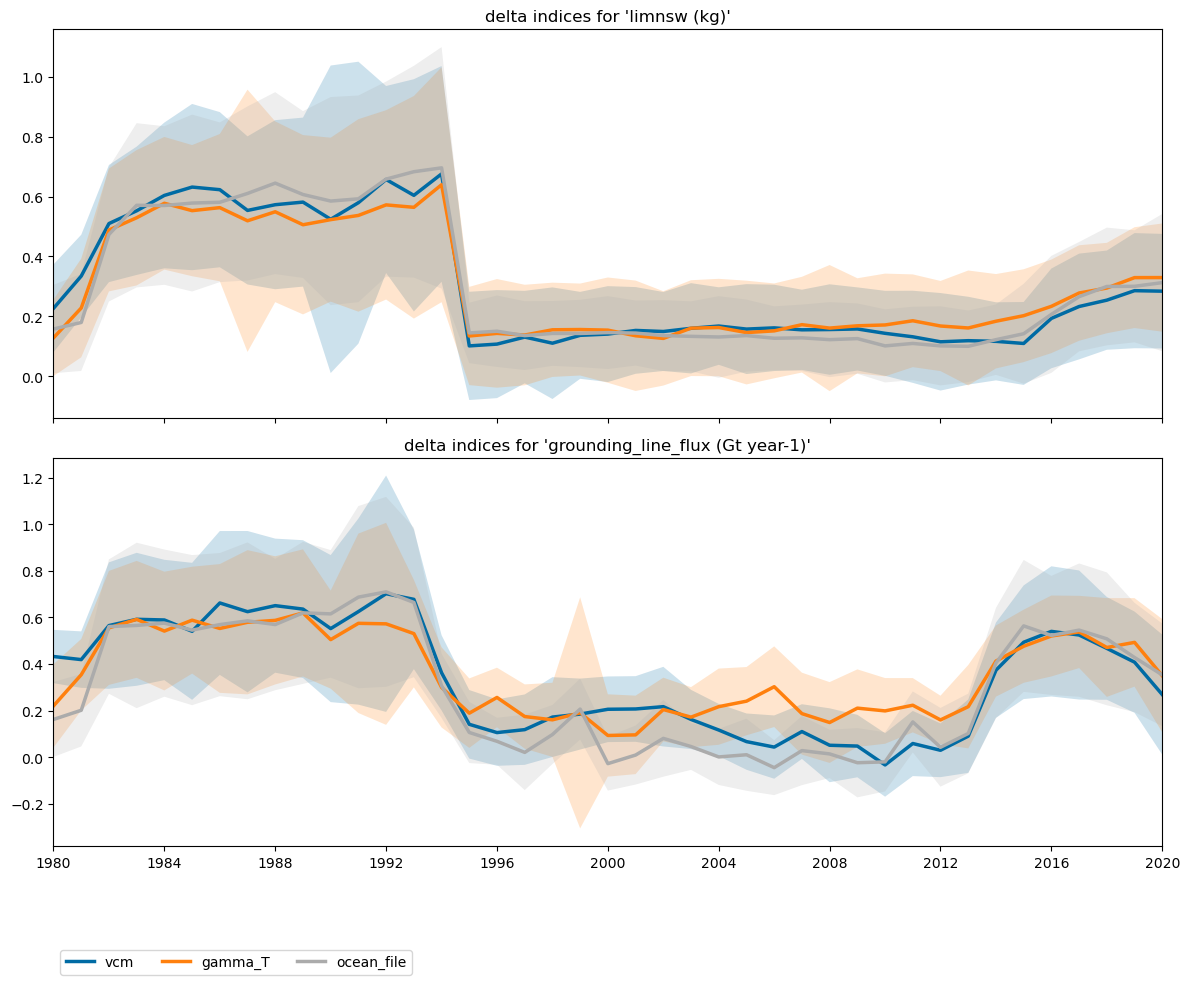

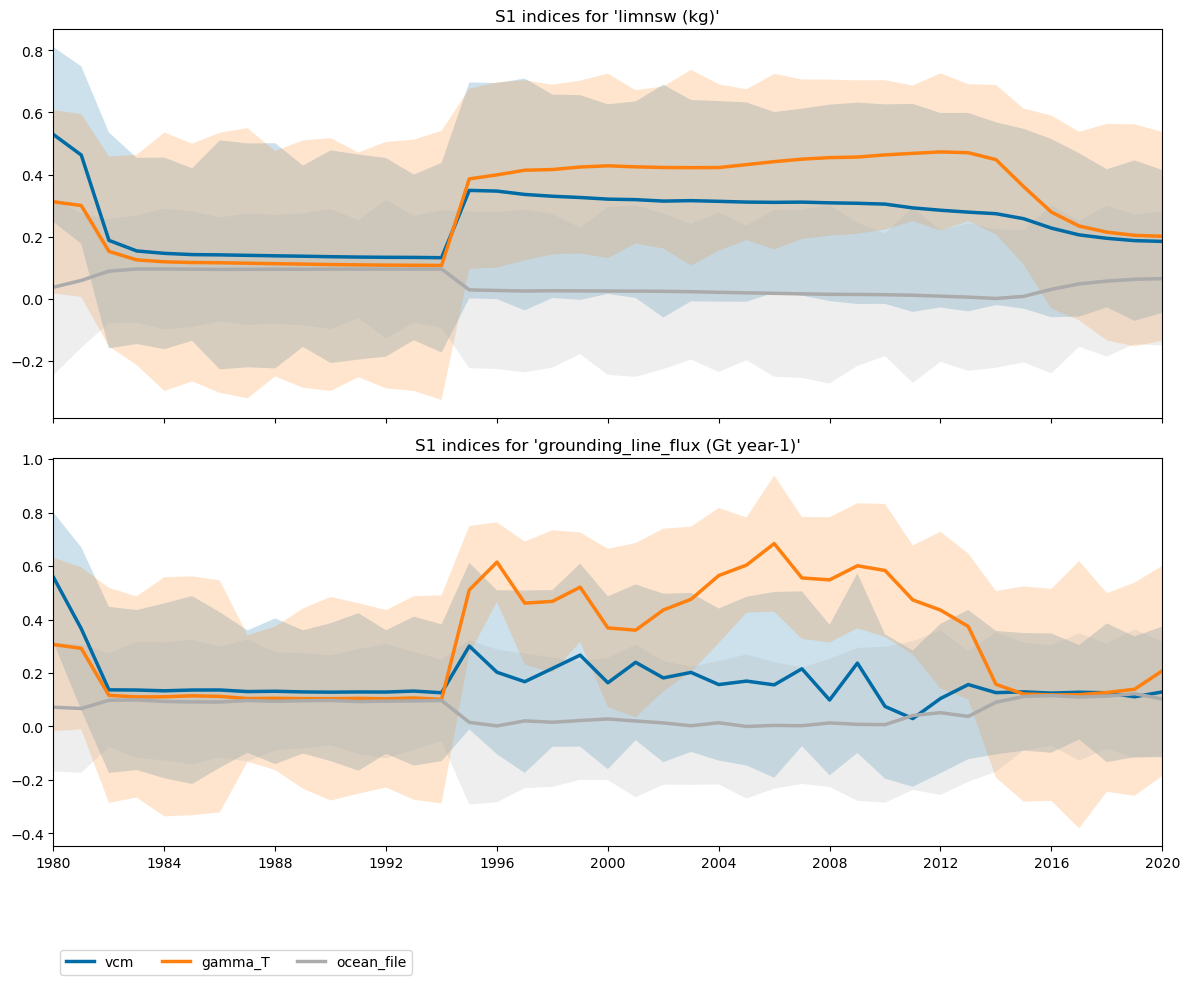

In [49]:
plt.style.use("tableau-colorblind10")

for si in ["delta", "S1"]:

    fig, axs = plt.subplots(
        2,
        1,
        sharex="col",
        figsize=[12, 10],
    )
    fig.subplots_adjust(bottom=0.0)
    for k, m_var in enumerate(["limnsw (kg)", "grounding_line_flux (Gt year-1)"]):
        m_df = sa_df[sa_df["Variable"] == m_var]
        ax = axs.ravel()[k]
        p_df = m_df[m_df["Si"] == si].drop(columns=["Si", "Variable"]).set_index("Date")
        p_conf_df = m_df[m_df["Si"] == si + "_conf"].drop(columns=["Si"])

        [
            ax.plot(p_df.index, p_df[v], lw=2.5, label=v)
            for v in sa_df.drop(columns=["Si", "Variable", "Date"]).keys()
        ]

        [
            ax.fill_between(
                p_df.index,
                p_df[v].values - p_conf_df[v].values,
                p_df[v].values + p_conf_df[v].values,
                alpha=0.2,
                lw=0,
            )
            for v in sa_df.drop(columns=["Si", "Variable", "Date"]).keys()
        ]
        ax.set_xlim(datetime(1980, 1, 1), datetime(2020, 1, 1))
        lgd = ax.set_title(f"{si} indices for '{m_var}'")
    legend = axs[-1].legend(loc="lower left", ncols=3, bbox_to_anchor=(0, -0.35))
    fig.tight_layout()


In [ ]:
import seaborn as sns

In [ ]:
df["limnsw (kg)"] - df["limnsw (kg)"][]

In [ ]:
sns.lineplot(data=df, x="time", y="limnsw (kg)", hue="id", ci = None)

In [ ]:
for id, ens in df.groupby(by="id"):
    print(ens[ens["Year"] == 1992])

In [ ]:
df["Year"]

In [ ]:
ens["limnsw (kg)"] - norm_year["limnsw (kg)"].values

In [20]:
norm_year = 1992.0
for k, ens in df.rename(columns={"limnsw": "Mass (Gt)"}).groupby(by="id"):
    print(ens - ens[ens["Year"] == norm_year].values)

         time id basal_mass_flux_floating (Gt year-1)  \
0  -4383 days  0                          -239.215182   
1  -4017 days  0                          -111.856908   
2  -3652 days  0                           -67.511713   
3  -3287 days  0                           -49.657907   
4  -2922 days  0                            -37.40523   
5  -2556 days  0                           -25.665134   
6  -2191 days  0                             -9.50717   
7  -1826 days  0                             3.201658   
8  -1461 days  0                              9.65995   
9  -1095 days  0                             5.057702   
10  -730 days  0                            -0.337763   
11  -365 days  0                             1.185636   
12     0 days  0                                  0.0   
13   366 days  0                            -1.974385   
14   731 days  0                            -7.190147   
15  1096 days  0                            -4.040315   
16  1461 days  0               

In [28]:
import seaborn as sns

In [31]:
df

,time,id,basal_mass_flux_floating (Gt year-1),basal_mass_flux_grounded (Gt year-1),dt (year),grounding_line_flux (Gt year-1),ice_area_glacierized (m2),ice_area_glacierized_cold_base (m2),ice_area_glacierized_floating (m2),ice_area_glacierized_grounded (m2),...,tendency_of_ice_mass_due_to_basal_mass_flux (Gt year-1),tendency_of_ice_mass_due_to_calving (Gt year-1),tendency_of_ice_mass_due_to_conservation_error (Gt year-1),tendency_of_ice_mass_due_to_discharge (Gt year-1),tendency_of_ice_mass_due_to_flow (Gt year-1),tendency_of_ice_mass_due_to_surface_mass_flux (Gt year-1),tendency_of_ice_mass_glacierized (Gt year-1),tendency_of_ice_volume (m3 year-1),tendency_of_ice_volume_glacierized (m3 year-1),Year
0,1980-01-01,0,-607.622897,-536.720344,0.010550,-425.469217,1.780798e+12,1.118308e+12,6.302466e+09,1.774495e+12,...,-1144.343241,-209.506347,0.0,-218.001001,2.185673e-12,498.768718,-882.355443,-9.489841e+11,-9.696214e+11,1980.0
1,1981-01-01,0,-527.414898,-111.116930,0.010504,-357.199105,1.779441e+12,1.119235e+12,5.469812e+09,1.773971e+12,...,-638.531827,-193.006078,0.0,-198.089475,1.709145e-12,411.197947,-426.383252,-4.674982e+11,-4.685530e+11,1981.0
2,1982-01-01,0,-421.894561,-84.250476,0.010498,-354.493819,1.778279e+12,1.119012e+12,4.298308e+09,1.773981e+12,...,-506.145037,-186.096981,0.0,-190.288857,6.354542e-13,414.459281,-283.440806,-3.098622e+11,-3.114734e+11,1982.0
3,1983-01-01,0,-348.946087,-72.720014,0.010375,-382.430977,1.777898e+12,1.119247e+12,3.482334e+09,1.774416e+12,...,-421.666101,-167.555419,0.0,-171.733887,5.043679e-12,588.690789,-5.371027,-5.174945e+09,-5.902228e+09,1983.0
4,1984-01-01,0,-329.556670,-69.547270,0.010276,-367.627140,1.778201e+12,1.119980e+12,3.151343e+09,1.775049e+12,...,-399.103939,-142.823039,0.0,-146.767311,2.037284e-12,582.505753,36.357158,4.025769e+10,3.995292e+10,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,2004-01-01,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0
25,2005-01-01,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
26,2006-01-01,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
27,2007-01-01,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
